In [1]:
### python 3.5 version
### virtualEnv_name is helloTF

import tensorflow as tf
tf.__version__

'1.6.0'

In [2]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# seart a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
## 더하기 예제
# Build graph (tensor) using TensorFlow operations
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [4]:
print("node1: {} node2: {}".format(node1,node2))
print("node3: {}".format(node3))

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [5]:
# feed data and run graph (operation) sess.run(op)
sess = tf.Session() 
print("sess.run(node1, node2): ".format(sess.run([node1, node2])))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2): 
sess.run(node3):  7.0


In [6]:
# placeholder(상수가 아닌 변수를 만들어줌)
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict={a: 3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


In [7]:
### Lab2
### Linear Regression

## 1. Build graph using TF operations
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# tf.Variable의 의미는 tesnsorflow가 사용하는 변수라는 의미 or trainable variable
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
# Our hypothesis Xw+b
hypothesis = x_train * w + b

In [8]:
# cost/loss funtion
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) # 평균을 내줌

In [9]:
# Minimize(GradientDescent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [10]:
## 2. Run/update graph and get results
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph - 사용하기 전에 변수 초기화가 필요함.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 2.3425152 [0.08517604] [0.49376628]
20 0.09396756 [0.6295492] [0.69111884]
40 0.06690525 [0.69469994] [0.6796402]
60 0.060597274 [0.7135939] [0.6496993]
80 0.055033907 [0.7274868] [0.6193563]
100 0.049982663 [0.7403351] [0.590267]
120 0.04539506 [0.75254226] [0.5625284]
140 0.041228488 [0.7641722] [0.53609174]
160 0.03744441 [0.77525526] [0.51089746]
180 0.034007605 [0.7858175] [0.48688716]
200 0.030886238 [0.7958833] [0.46400526]
220 0.028051397 [0.80547595] [0.4421987]
240 0.02547673 [0.81461793] [0.42141703]
260 0.023138365 [0.8233302] [0.40161204]
280 0.021014668 [0.831633] [0.38273776]
300 0.019085841 [0.83954567] [0.36475044]
320 0.01733406 [0.8470864] [0.34760854]
340 0.015743079 [0.8542728] [0.3312722]
360 0.0142981075 [0.8611214] [0.3157036]
380 0.012985772 [0.8676483] [0.30086666]
400 0.011793879 [0.87386835] [0.28672698]
420 0.01071138 [0.879796] [0.27325183]
440 0.009728243 [0.8854452] [0.26040995]
460 0.008835348 [0.89082885] [0.24817172]
480 0.008024416 [0.8959594] [0.2

In [11]:
# Now we can use x and y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/336693740/
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis xw+b
hypothesis = x * w + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y)) # 평균을 내줌

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# launch the graph in a session
sess = tf.Session()
# initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# fit the line with new training data
for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, w , b, train],
                                        feed_dict={x: [1,2,3,4,5], y:[2.1,3.1,4.1,5.1,6.1]}) # _ 변수는 필요없다는 의미
    if step % 20 == 0:
        print(step, cost_val, w_val, b_val)
        
# Testing our model
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[2.5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[1.5, 3.5]}))

0 1.39097 [0.99952626] [2.0325687]
20 0.12011383 [0.77686006] [1.9098105]
40 0.10487388 [0.79046774] [1.8564967]
60 0.09158716 [0.8041857] [1.8069518]
80 0.079983614 [0.81700975] [1.7606527]
100 0.06985028 [0.828994] [1.717386]
120 0.061000835 [0.8401933] [1.676953]
140 0.05327248 [0.85065913] [1.6391677]
160 0.046523236 [0.8604396] [1.6038572]
180 0.040629134 [0.8695795] [1.5708592]
200 0.03548169 [0.87812084] [1.5400224]
220 0.03098644 [0.8861028] [1.5112048]
240 0.027060676 [0.893562] [1.4842746]
260 0.023632292 [0.9005327] [1.4591082]
280 0.020638283 [0.9070469] [1.43559]
300 0.01802353 [0.9131346] [1.4136119]
320 0.015740097 [0.9188234] [1.3930732]
340 0.013745969 [0.9241397] [1.3738798]
360 0.012004473 [0.9291078] [1.3559433]
380 0.010483586 [0.93375057] [1.3391813]
400 0.0091553675 [0.9380893] [1.3235171]
420 0.007995456 [0.9421439] [1.3088788]
440 0.0069825053 [0.9459329] [1.295199]
460 0.006097854 [0.9494739] [1.2824153]
480 0.0053253165 [0.95278287] [1.2704688]
500 0.00465063

In [12]:
### lab3
## 경사하강법이 잘 적용되는지 확인
import matplotlib.pyplot as plt

x=[1,2,3]
y=[1,2,3]

w = tf.placeholder(tf.float32)
# Our hypothesis f or linear model X*W
hypothesis = x*w

In [13]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))

In [14]:
# Launch the graph in a session.
sess = tf.Session()
# Initializess global variables in the graph.
sess.run(tf.global_variables_initializer())

In [15]:
# Variables for plotting cost function
w_val = []
cost_val = []
for i in range(-30, 50):
    feed_w = i * 0.1
    curr_cost, curr_w = sess.run([cost, w], feed_dict={w: feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)

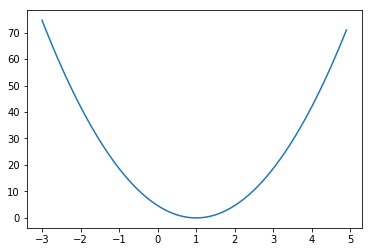

In [16]:
# Show the cost function
plt.plot(w_val, cost_val)
plt.show()

In [17]:
## 최소화 모델
x_data = [1,2,3]
y_data = [1,2,3]

w = tf.Variable(tf.random_normal([1]), name='weight')
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [18]:
# Our hypothesis for linear model X*W
hypothesis = x*w
# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - y))

In [19]:
# Minimize : Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((w*x - y) * x)
descent = w - learning_rate * gradient
update = w.assign(descent)

In [20]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={x:x_data, y:y_data})
    print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w))

0 9.15367 [0.19140023]
1 2.6037104 [0.5687468]
2 0.7406109 [0.7699983]
3 0.2106626 [0.87733245]
4 0.059921816 [0.9345773]
5 0.017044473 [0.96510786]
6 0.0048482283 [0.98139083]
7 0.0013790478 [0.9900751]
8 0.00039225517 [0.99470675]
9 0.00011157393 [0.99717695]
10 3.17362e-05 [0.9984944]
11 9.027186e-06 [0.999197]
12 2.5678382e-06 [0.99957174]
13 7.303638e-07 [0.9997716]
14 2.0780215e-07 [0.99987817]
15 5.914019e-08 [0.99993503]
16 1.6801994e-08 [0.99996537]
17 4.766619e-09 [0.9999815]
18 1.3635173e-09 [0.9999901]
19 3.9587533e-10 [0.9999947]
20 1.0887291e-10 [0.9999972]
